In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Logical Regression, KNN, SVM and decision tree are discussed here

# Logical Regression

TO know more details please refer the python file "Applications of supervised learning Technique_Loan dataset". Random forest is described in that file

In [54]:
data= pd.read_csv("Social_Network_Ads.csv")

In [55]:
data.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [56]:
data.shape

(400, 5)

In [57]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
data["Purchased"].value_counts() # To find the counts of each value in Purchase column. Sice it have only 2 value "0" and "1" it is shown.

0    257
1    143
Name: Purchased, dtype: int64

In [59]:
data["Purchased"].value_counts(normalize= True) # to find the percentage of ecah value

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [60]:
data.isna().sum() # to find null value

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# One hot encording to covert categorical value

In [61]:
data= pd.get_dummies(data)
data

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


categorical value " gender " is split into encorded in numerical terms

# Splitting data set into feature and target 


in this case target is "Purchased" column so "Purchased" column is taken as y and all other column except user and y ,"Purchased" is  taken as x

In [62]:
y=data["Purchased"]
X=data.drop(["Purchased","User ID"], axis =1) # since user id have no relevence in data it is drooped

In [63]:
# Splitting the data set to training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y,random_state=42,test_size=.2)

In [64]:
X_train.shape
y.shape

(400,)

In [65]:
# Create logical regression model

In [66]:
from sklearn.linear_model import LogisticRegression # import logical regression from skl library and create the model
logit_model = LogisticRegression()          # to create an instance of the model
logit_model.fit(X_train, y_train) # to fit the regression model
y_prediction= logit_model.predict(X_test) # to predict y value


Then the perfection of the model is found out using mse values and r square value

In [67]:
y_prediction.shape


(80,)

In [68]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score,f1_score

In [69]:
print("Accuracy is ",accuracy_score(y_test, y_prediction))
print("Precision is ",precision_score(y_test, y_prediction))
print("Recall is ",recall_score(y_test, y_prediction))
print("F1 score is ",f1_score(y_test, y_prediction))

Accuracy is  0.65
Precision is  0.0
Recall is  0.0
F1 score is  0.0


C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
confusion_matrix(y_test, y_prediction)

array([[52,  0],
       [28,  0]], dtype=int64)

Here total error value is 28 (please refer confusion matrix in note book)

#                              ********************KNN********************

In [71]:
from sklearn.neighbors import KNeighborsClassifier # Improt library

Find the optimun k value . For this we need to create the model a varied k value . Step to find optimum k values is given below

In [72]:
acc_value=[] # Create an emply list
neighbors=np.arange(3,15) # taking values form 3 to 15 to a list "neighbors"

for k in neighbors: # Create a loop to create kNN for each K value
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski") # Inside the bracket we need to specify some parameter
    #metic is the method used to measure the distance , n_neighbors mean number of k value, here it is "k"
    classifier.fit(X_train,y_train) # Create the model
    y_pred=classifier.predict(X_test) # Predict the  model NOW KNN IS CREATED 
    acc=accuracy_score(y_test, y_pred) #accuracy values is taken to a variable "acc"
    acc_value.append(acc) # these accuracy values is appened to the list 
    

In [73]:
acc_value 

[0.8,
 0.8,
 0.825,
 0.775,
 0.8125,
 0.775,
 0.7875,
 0.775,
 0.8,
 0.775,
 0.75,
 0.7625]

These are the accuracy values obtained for different k values . Out of this maximum accuracy is noted . Here it is 82.5%. We need to find for which k value this accuracy is obtained . For this we need to plot the graph ok k values and Accuracy value

Text(0, 0.5, 'Accuracy')

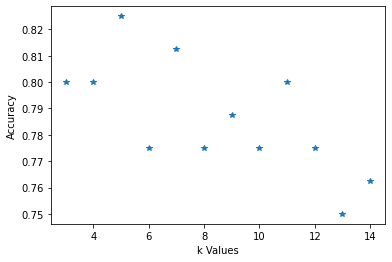

In [74]:
plt.plot(neighbors,acc_value , "*")
plt.xlabel("k Values")
plt.ylabel("Accuracy")

Here we can see that maximum accuracy 82.5 is obtained for k value 5. And noe we create the model with k value 5

In [75]:
classifier= KNeighborsClassifier(n_neighbors=5,metric="minkowski")
classifier.fit(X_train,y_train) # Create the model
y_pred=classifier.predict(X_test) # Predict the  model NOW KNN IS CREATED 

In [76]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.825
Precision is  0.7692307692307693
Recall is  0.7142857142857143
F1 score is  0.7407407407407408


In [77]:
confusion_matrix(y_test, y_pred)

array([[46,  6],
       [ 8, 20]], dtype=int64)

Here total error value is 14 (please refer confusion matrix in note book)

We can see that the accuracy of the model is incereased and error value is decreased than logical model

In [78]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


We can do standered scaling is done and check if the model efficency is increased

# Logical Regression after standered Scaling

In [79]:
from sklearn.preprocessing import StandardScaler   # Standerdisation of the model
scalar= StandardScaler()
x_train=scalar.fit_transform(X_train)
x_test=scalar.fit_transform(X_test)

In [80]:
X_train

,Age,EstimatedSalary,Gender_Female,Gender_Male
3,27,57000,1,0
18,46,28000,0,1
202,39,134000,1,0
250,44,39000,1,0
274,57,26000,1,0
...,...,...,...,...
71,24,27000,1,0
106,26,35000,1,0
270,43,133000,1,0
348,39,77000,0,1


In [29]:
x_train

array([[-1.06675246, -0.38634438,  1.        , -1.        ],
       [ 0.79753468, -1.22993871, -1.        ,  1.        ],
       [ 0.11069205,  1.853544  ,  1.        , -1.        ],
       ...,
       [ 0.50317355,  1.82445454,  1.        , -1.        ],
       [ 0.11069205,  0.19544481, -1.        ,  1.        ],
       [-0.57615058,  0.45724994,  1.        , -1.        ]])

Now we can see that x_train and x_test are having standeredised features

In [81]:
logit_model = LogisticRegression()          # to create an instance of the model
logit_model.fit(x_train, y_train) # to fit the regression model
y_pred= logit_model.predict(x_test) # to predict y value   #x_train and x_test are standerdised x whereas X_train and X_test are non standersided)

In [51]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.875
Precision is  0.875
Recall is  0.75
F1 score is  0.8076923076923077


In [82]:
confusion_matrix(y_test, y_pred)

array([[49,  3],
       [ 7, 21]], dtype=int64)

We can see that the efficency of the model is increased after doing scaling. We can see error values is also decrased to 10

# KNN after standered Scaling

In [83]:
acc_value=[] # Create an emply list
neighbors=np.arange(3,15) # taking values form 3 to 15 to a list "neighbors"

for k in neighbors: # Create a loop to create kNN for each K value
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski") # Inside the bracket we need to specify some parameter
    #metic is the method used to measure the distance , n_neighbors mean number of k value, here it is "k"
    classifier.fit(x_train,y_train) # Create the model
    y_pred=classifier.predict(x_test) # Predict the  model NOW KNN IS CREATED 
    acc=accuracy_score(y_test, y_pred) #accuracy values is taken to a variable "acc"
    acc_value.append(acc) # these accuracy values is appened to the list 
    

Text(0, 0.5, 'Accuracy')

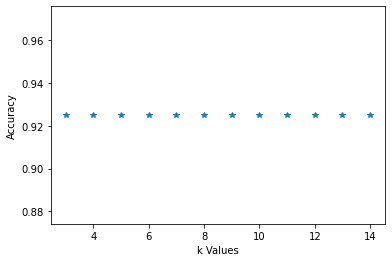

In [84]:
plt.plot(neighbors,acc_value , "*")
plt.xlabel("k Values")
plt.ylabel("Accuracy")

Same accuracy is obtained for all k values

In [85]:
classifier= KNeighborsClassifier(n_neighbors=5,metric="minkowski") # Inside the bracket we need to specify some parameter
#metic is the method used to measure the distance , n_neighbors mean number of k value, here it is "5" obtained for maximum accuracy
classifier.fit(x_train,y_train) # Create the model
y_pred=classifier.predict(x_test) # Predict the  model NOW KNN IS CREATED 

In [86]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))


Accuracy is  0.925
Precision is  0.8666666666666667
Recall is  0.9285714285714286
F1 score is  0.896551724137931


In [87]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 2, 26]], dtype=int64)

We can see that the efficency of the model is increased after doing scaling. We can see error values is also decrased to 10

# Decision Tree Algorith 

In [88]:
from sklearn.tree import DecisionTreeClassifier # Import library function
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred=dt_model.predict(X_test)

In [89]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.8375
Precision is  0.8
Recall is  0.7142857142857143
F1 score is  0.7547169811320756


In [90]:
confusion_matrix(y_test, y_pred)

array([[47,  5],
       [ 8, 20]], dtype=int64)

# SVM Algorith

Based on Keranal there are three different types of SVM


# Linear SVM

In [91]:
from sklearn.svm import SVC  # import  support vector classifier (SVC)
linear_svm= SVC(kernel="linear") #instance is created but argument is kernel= "linear")
linear_svm.fit(X_train, y_train) # Training the model 

SVC(kernel='linear')

In [92]:
y_pred=linear_svm.predict(X_test)

In [93]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.8375
Precision is  0.8260869565217391
Recall is  0.6785714285714286
F1 score is  0.7450980392156864


In [94]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 9, 19]], dtype=int64)

Here the exhibition time is more because of the difference in scales of features of slaray and age . Salary is in the range from 10000 and above whereas age is in the range from 20 to 70. Scaling can be done to overcome this problem

# Standerdising the feature

Here we use x_train and x_test and not X_train and X_test because small x is having the standerdiesed set

In [100]:
from sklearn.svm import SVC  # import  support vector classifier (SVC)
linear_svm= SVC(kernel="linear") #instance is created but argument is kernel= "linear")
linear_svm.fit(x_train, y_train) # Training the model 

SVC(kernel='linear')

In [99]:
y_pred=linear_svm.predict(x_test)

In [98]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.85
Precision is  0.8333333333333334
Recall is  0.7142857142857143
F1 score is  0.7692307692307692


In [101]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 8, 20]], dtype=int64)

We can see that the there is a reduction in false value in  confusion matrix

# Polynomial SVM

In [102]:
from sklearn.svm import SVC  # import  support vector classifier (SVC)
poly_svm= SVC(kernel="poly", degree= 3) #instance is created but argument is kernel= "poly" and degree "3". We can choose any degree)
poly_svm.fit(X_train, y_train) # Training the model 

SVC(kernel='poly')

In [103]:
y_pred=poly_svm.predict(x_test)

In [104]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))

Accuracy is  0.65
Precision is  0.0
Recall is  0.0
F1 score is  0.0


C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
confusion_matrix(y_test, y_pred)

array([[52,  0],
       [28,  0]], dtype=int64)

# Radial SVM

In [107]:
from sklearn.svm import SVC  # import  support vector classifier (SVC)
rad_svm= SVC(kernel="rbf") # kernel is radial basis function
rad_svm.fit(X_train, y_train) # Training the model 
y_pred=poly_svm.predict(x_test)

In [108]:
#Then the efficieny of the model is checked
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("Precision is ",precision_score(y_test, y_pred))
print("Recall is ",recall_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is  0.65
Precision is  0.0
Recall is  0.0
F1 score is  0.0


C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[52,  0],
       [28,  0]], dtype=int64)